<a href="https://colab.research.google.com/github/dileep-rawat/Capstone_Project-4-Netflix_Movie_and_TV_Shows-Clustering/blob/main/Notebook_of__Netflix_Movie_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movie and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member-1**        - Dileep Rawat


# **Project Summary -**


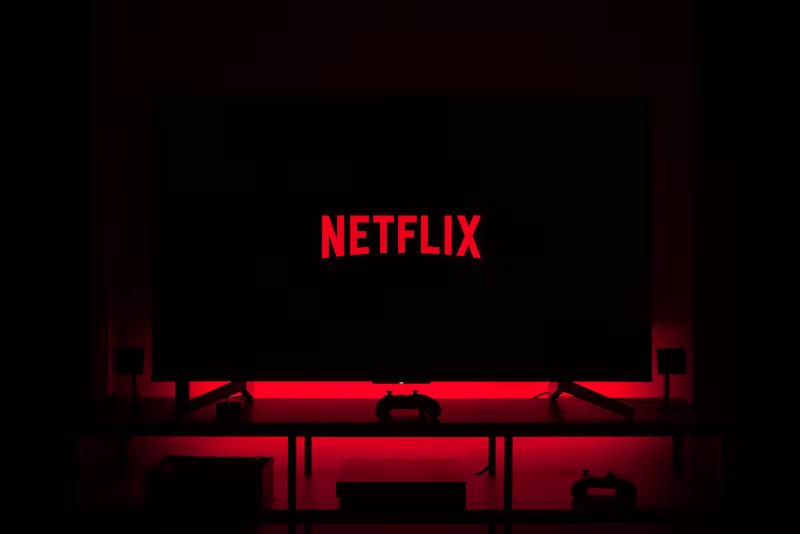

*Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.*

*This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.*


*In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.*

- *The dataset contained about 7787 records, and 11 attributes.* 

- *In the initial phase, we have focused more on the data cleaning and analyzed data in various categories and then we did exploratory data analysis (EDA).*

- *We Created cluster using following attributes like director, cast, country, genre, rating and description. These attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.*

- *We used Principal Component Analysis (PCA) to handle the curse of dimensionality.*

- *We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.*

- *A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.*

# **GitHub Link** -

https://github.com/dileep-rawat/Capstone_Project-4-Netflix_Movie_and_TV_Shows-Clustering

# **Problem Statement**


<b>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
netflix_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/ Netflix-Movie-and-TV-Shows-Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Dataset First Look
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'number of rows : {netflix_df.shape[0]}  \nnumber of columns : {netflix_df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [ ]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Missing Values Percentage
round(netflix_df.isna().sum()/netflix_df.shape[0]*100, 2).sort_values(ascending=False).head(5)

director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64

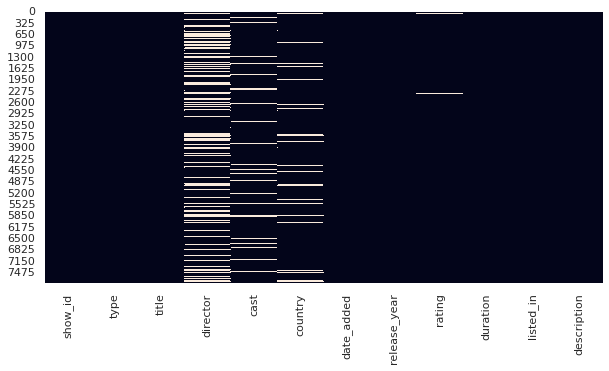

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(netflix_df.isnull(), cbar=False)

### What did you know about your dataset?

NaN values present in the director, cast, country, date_added and rating column. 

All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty space in below procedure analyzing each columns.  

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
netflix_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ***3. Variables Description***

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("No. of unique values in ",i,"is",netflix_df[i].nunique(),".")

No. of unique values in  show_id is 7787 .
No. of unique values in  type is 2 .
No. of unique values in  title is 7787 .
No. of unique values in  director is 4049 .
No. of unique values in  cast is 6831 .
No. of unique values in  country is 681 .
No. of unique values in  date_added is 1565 .
No. of unique values in  release_year is 73 .
No. of unique values in  rating is 14 .
No. of unique values in  duration is 216 .
No. of unique values in  listed_in is 492 .
No. of unique values in  description is 7769 .


- **After analysing dataset we are more focusing toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' columns and these column carry a lots of information.**
- **We are building our model on the top of mentioned features where those feature are used to create one cluster column to implement K-means, Hierarchical clustering and building content based recommandation system as well.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

### **4.1. type Column:**

Movie      5377
TV Show    2410
Name: type, dtype: int64
 


Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

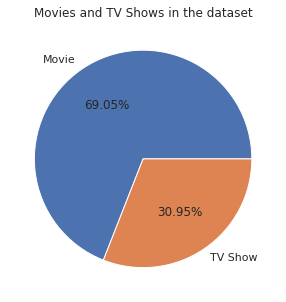

In [ ]:
# type Column Value Counts
print(netflix_df.type.value_counts())
print(" ")

# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(10,5))
netflix_df['type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

**Analysis from above graph.**
1. **Greater number of count belong from movie class than Tv show class.**  
2. **There are more movies (69.05%) than TV shows (30.95%)  in the dataset.**

### **4.2 Title column:**

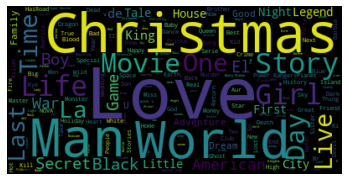

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['title'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Analysis from above graph.**
1. **The words like Christmas, Love, World, Man and  Story are very comman word which are appear most in movie title column.**  

### **4.3 Director column:**

In [ ]:
print(f"number of director who  by directed movie : { netflix_df[netflix_df['type']=='Movie']['director'].value_counts().sum()}")
print(f"number of director who  by directed TV Show : { netflix_df[netflix_df['type']=='TV Show']['director'].value_counts().sum()}")

number of director who  by directed movie : 5214
number of director who  by directed TV Show : 184


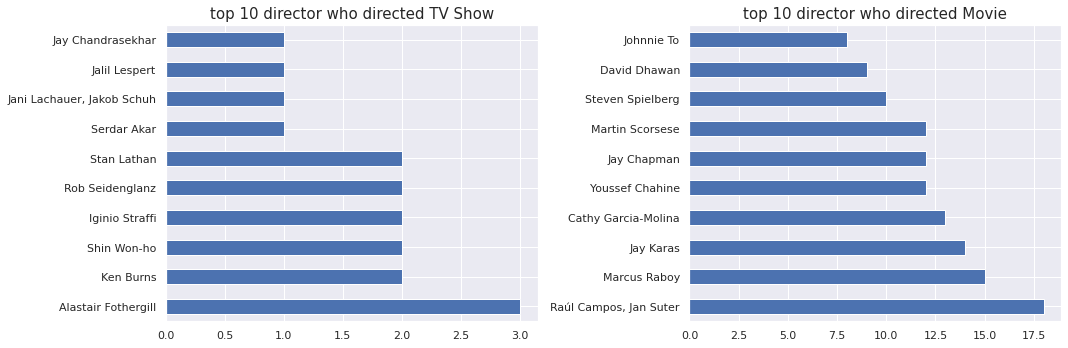

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 director who directed TV show
show = netflix_df[netflix_df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=15)

# top 10 director who directed movie
movie = netflix_df[netflix_df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=15)

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **Alastair Fothergill has directed three TV shows, the most of any director.**
2. **Raul Campos and Jan Suter have togather directed in 18 movies, higher than anyone yet.**
3. **This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina**


### **4.4 Cast column:**

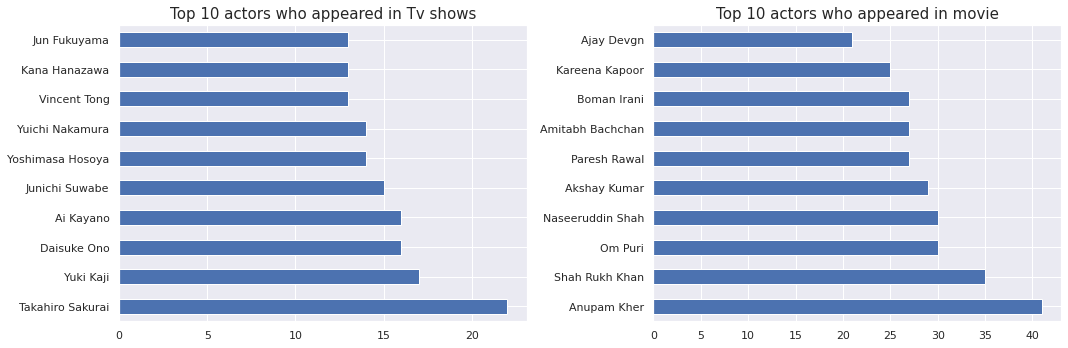

In [ ]:
#defing fig size and axis
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 TV shows actor 
TV_shows = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=15)

# top 10 Movie actor 
movies = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=15)

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.**
2. **Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.**

### **4.5 Country column:**

Text(0.5, 1.0, 'Top 10 countries with the highest number of movies / TV shows')

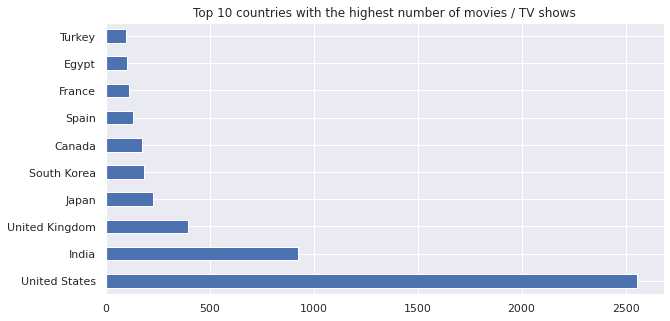

In [ ]:
# Top 10 countries with the highest number movies / TV shows in the dataset
plt.figure(figsize=(10,5))
netflix_df.country.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 countries with the highest number of movies / TV shows')

**Analysis from above graph.**
1. **The highest number of movies / TV shows were based out of the US, followed by India and UK.**

### **4.6 Release_Year column:**

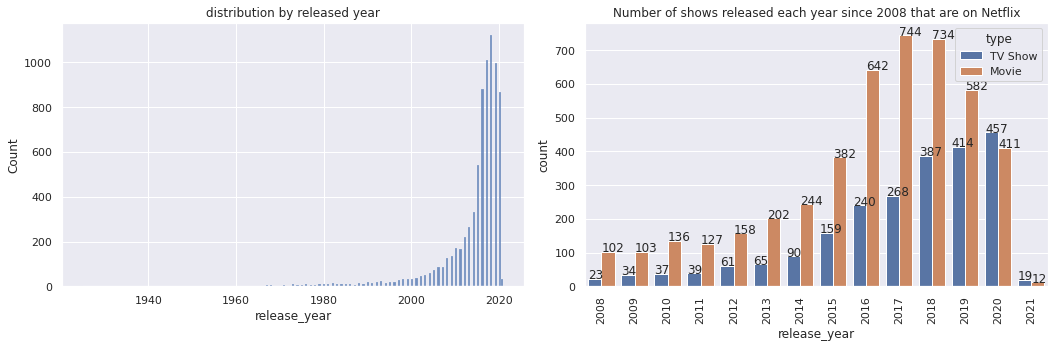

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Univariate analysis
hist = sns.histplot(netflix_df['release_year'], ax=ax[0])
hist.set_title('distribution by released year')

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=netflix_df, order=range(2008,2022), ax=ax[1])
count.set_title('Number of shows released each year since 2008 that are on Netflix')
plt.xticks(rotation=90)
for p in count.patches:  #adding value count on the top of bar
   count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **Netflix has greater number of new movies / TV shows than the old ones.**
2. **Over the years, Netflix has consistently focused on adding more shows in its platform.**
3. **Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.**
4. **This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.**

### **4.7 Rating column:**

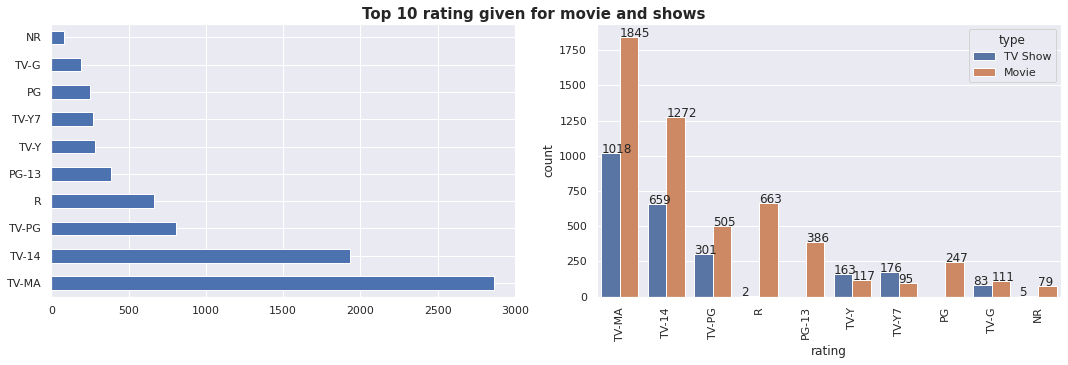

In [ ]:
# Top 10 Rating 
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', size=15, y=1.01)

# univariate analysis
netflix_df['rating'].value_counts()[:10].plot(kind='barh',ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)
for p in graph.patches:  #adding value count on the top of bar
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.tight_layout()
plt.show()

**Analysis from above graph.**
1. **most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).**



### **4.8 Duration column:**

In [ ]:
# duration column
netflix_df['duration']

0       4 Seasons
1          93 min
2          78 min
3          80 min
4         123 min
          ...    
7782       99 min
7783      111 min
7784       44 min
7785     1 Season
7786       90 min
Name: duration, Length: 7787, dtype: object

In [ ]:
# Creating 2 different dataset from duration
netflix_shows=netflix_df[netflix_df['type']=='TV Show']
netflix_movies=netflix_df[netflix_df['type']=='Movie']

#### **4.8.1 Netflix Movie Duration**

Text(0.5, 0, 'Year')

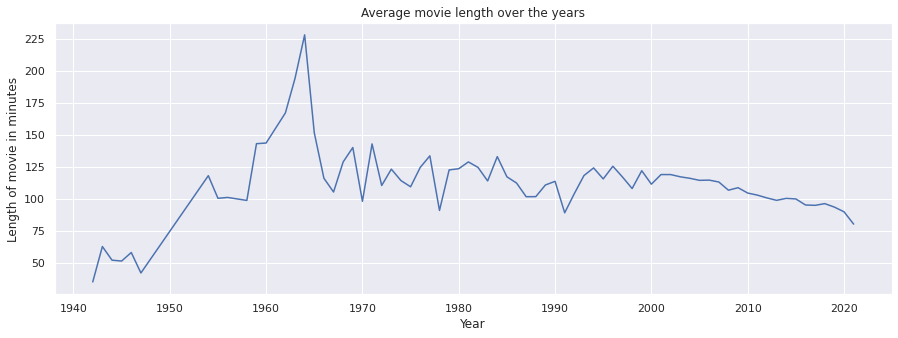

In [ ]:
# movie duration 
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)

# Average movie length over the years
plt.figure(figsize=(15,5))
netflix_movies.groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

**Analysis from above graph.**
* **Netflix has several movies on its site, including those that were released in way back 1942.**
* **As per the plot, movies made in the 1940s had a fairly short duration on average.**
* **On average, movies made in the 1960s have the longest movie length.**
* **The average length of a movie has been continuously decreasing since the 2000s.**

#### **4.8.2 Netflix TV show Duration**

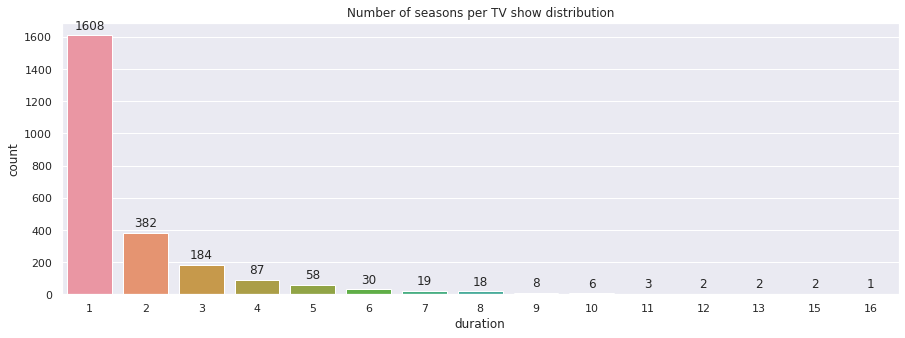

In [ ]:
# TV show duration 
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Season','')
netflix_shows['duration']=netflix_shows['duration'].str.replace(' Seasons','')
netflix_shows['duration']=netflix_shows['duration'].str.replace('s','')
netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)

# Seasons in each TV show
plt.figure(figsize=(15,5))
p = sns.countplot(x='duration',data=netflix_shows)
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

**Analysis from above graph.**
* **The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. This might mean that the majority of TV shows has only recently begun, and that further seasons are on the way.**
* **There are very few TV shows that have more than 8 seasons.**

### **4.9 Listed in** 

Text(0.5, 1.0, 'Top 10 genres')

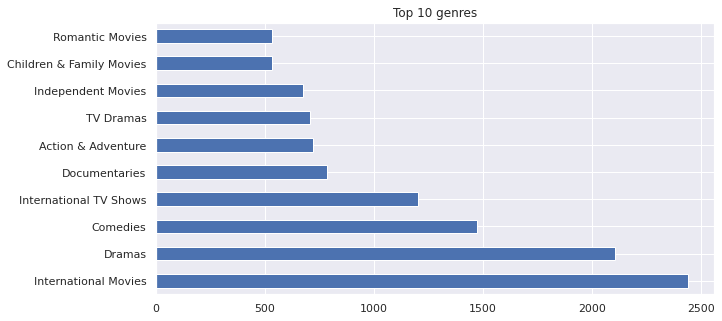

In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = netflix_df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
plt.figure(figsize=(10,5))
genres = genres.value_counts()[:10].plot(kind='barh')
plt.title('Top 10 genres')

**Analysis from above graph.**
1. **The International movie is the most popular genre followed by dramas and comedies.**

### **4.10 Description**

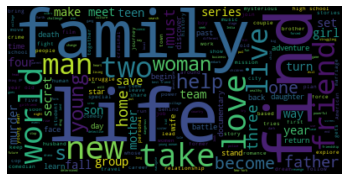

In [ ]:
# text documents
text = " ".join(word for word in netflix_df['description'])

# create the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

**Analysis from above graph.**
1. Most of the comman words present in description column are family, find, life, love, new, world, friend.


## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

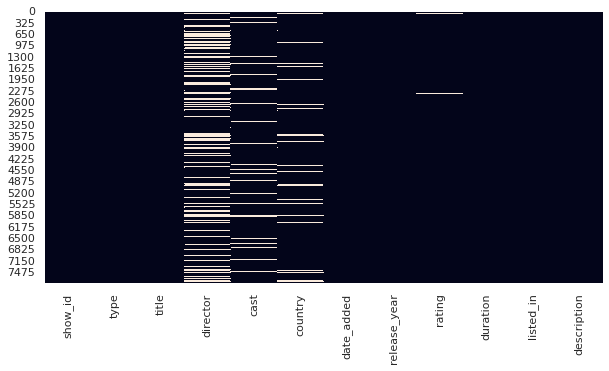

In [ ]:
# Handling Missing Values & Missing Value Imputation
plt.figure(figsize=(10,5))
sns.heatmap(netflix_df.isnull(), cbar=False)

In [ ]:
# Missing Data %
round(netflix_df.isna().mean().sort_values(ascending=False)*100,2)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

- The missing values in the director, cast, and country attributes can be replaced with 'empty string'
- Small amount of null value percentage is present in rating and date_added column and if we drop these nan values it will not affect that much while building the model.

In [ ]:
# Handling Missing Values & Missing Value Imputation
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna(' ')
netflix_df.dropna(axis=0, inplace=True)

In [ ]:
# checking for null values after treating them.
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We have successfully handled all the missing values in the dataset.

### 2. Handling Outliers

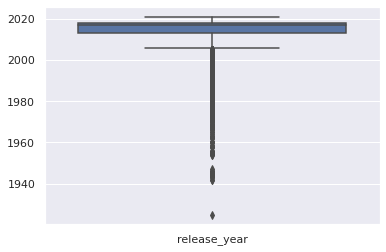

In [ ]:
# Handling Outliers & Outlier treatments
sns.boxplot(data=netflix_df)

- Since, the almost all of the data present in textual format except release year.
- The data that we need to create cluster/building model are present in textual foramat. So, there is no need to perform handling outlier.

## ***6. Textual Data Preprocessing***
**Modeling Approach**
1. Select the attributes based on which you want to cluster the shows
2. Text preprocessing: Remove all stopwords and punctuation marks, convert all textual data to lowercase.
3. Stemming to generate a meaningful word out of corpus of words.
4. Tokenization of corpus and Word vectorization
5. Dimensionality reduction
6. Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
7. Build optimal number of clusters and visualize the contents of each cluster using wordclouds.

### **6.1. Clustering Attributes**

We will cluster the movie/shows on Netflix based on the following attributes:

- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [ ]:
# Using the original dataset for clustering since
# it does not require handling missing values
df1 = netflix_df.copy()

In [ ]:
# creating clustering_attributes column using all text column which one is used for model building purpose.
df1['clustering_attributes'] = df1['description'] + df1['listed_in'] + df1['rating'] + df1['cast'] + df1['country'] + df1['director']

In [ ]:
df1.clustering_attributes[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

* **We have successfully added all the necessary data into a single column**

### **6.2. Removing non-ASCII characters:**

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [ ]:
df1['clustering_attributes'][0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoao Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zeze Motta, Celso FrateschiBrazil '

### **6.3. Removing stopwords and lower case::**

In [ ]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [ ]:
df1['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoao miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zeze motta, celso frateschibrazil'

* **We have successfully removed all the stopwords and converted the corpus to lowercase.**

### **6.4. Removing Punctuation:**

Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    # replacing the punctuations with no space, which deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [ ]:
df1['clustering_attributes'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoao miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazil'

* **We have successfully dropped all the punctuation marks from the corpus.**

### **6.5 Stemming:**

Stemming operation bundles together words of same root. e.g. stem operation bundles "response" and "respond" into a common "respon" 

Used **SnowballStemmer** to generate a meaningful word out of corpus of words.

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#performing stemming operation
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stemming)

In [ ]:
df1['clustering_attributes'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoao miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zeze motta celso frateschibrazil'

### **6.6 Text Vectorization**.

Text Vectorization is the process of converting text into numerical representation

- We will  vectorized the corpus using **TFIDF vectorizer**, where TFIDF stands for **Term Frequency Inverse Document Frequency**.

\begin{align}
        TF = \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document}
    \end{align}

\begin{align}
        IDF(t) = log_e(\frac{Total\  number \ of \ documents}{ Number\ of\ documents\ with\ term\ t\ in\ it })
    \end{align}

\begin{align}
TFIDF = {TF\ *\ IDF}
    \end{align}

In [ ]:
# # extract the tfid representation matrix of the text data
tfid_vectorizer= TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)  # max features = 10000 to prevent system from crashing
tfid_matrix = tfid_vectorizer.fit_transform(df1['clustering_attributes'])

# collect the tfid matrix in numpy array
array = tfid_matrix.toarray()  

In [ ]:
print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


#### 5. **Dimensionality Reduction:**

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible.

* We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=0)
pca.fit(array)

PCA(random_state=0)

Text(0, 0.5, 'cumulative explained variance')

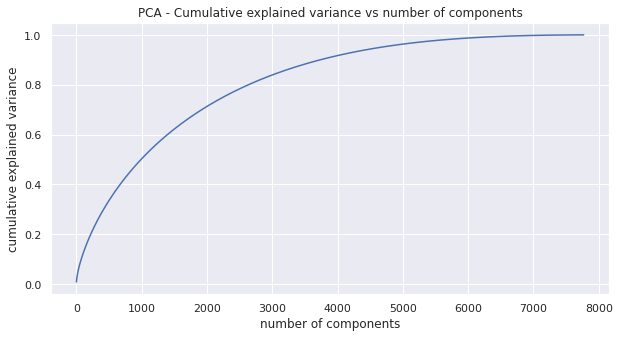

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

* We find that **100%** of the variance is explained by about **~7600 components**.
* Also, more than **80%** of the variance is explained just by **4000 components**.
* Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=0)
pca.fit(array)

PCA(n_components=4000, random_state=0)

In [ ]:
# transformed features
X = pca.transform(array)

# shape of transformed vectors
X.shape

(7770, 4000)

We have successfully reduced the dimensionality of data using PCA.

## **7. Clusters implementation**

### **7.1. K-Means Clustering**

K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

Text(0, 0.5, 'Sum of squared errors')

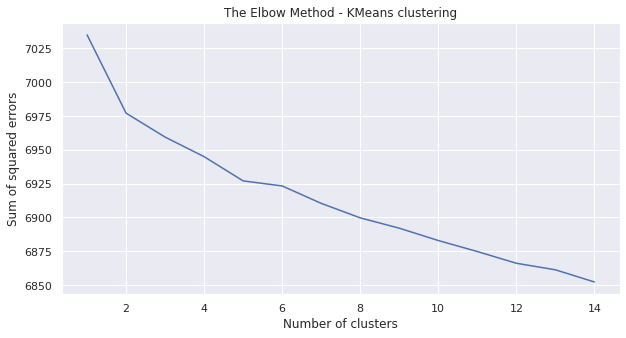

In [ ]:
# Elbow method to find the optimal value of k
SSE=[]
for i in range(1,15):
  # Initialize the k-means model with the current value of i
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the value of SSE
number_clusters = range(1,15)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')

- **The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.**

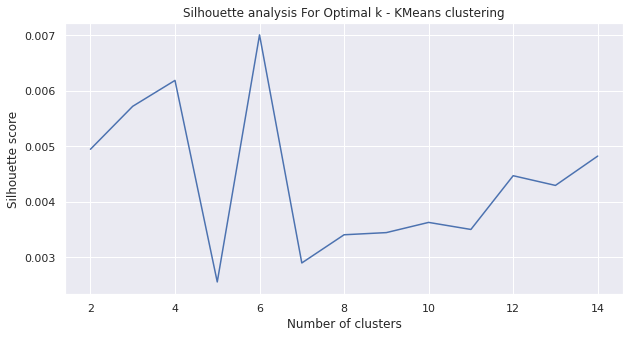

In [ ]:
#Silhouette score method to find the optimal value of k

# Initialize a list to store the silhouette score for each value of k
silhouette_scr = []

for k in range(2, 15):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_scr.append(score)
  
# Plot the Silhouette analysis
plt.figure(figsize=(10,5))
plt.plot(range(2,15), silhouette_scr)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* **The highest Silhouette score is obtained for 6 clusters.**

Building clusters using the k-means algorithm:

In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6923.21631521169, 0.007008324053458728)


In [ ]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

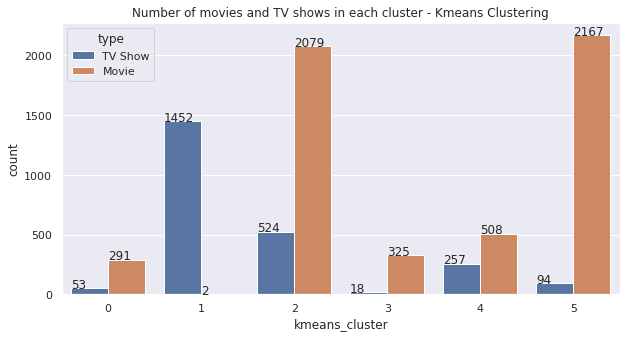

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

**Successfully built 6 clusters using the k-means clustering algorithm.**

### **7.1.1. Building wordclouds for different clusters built:**

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

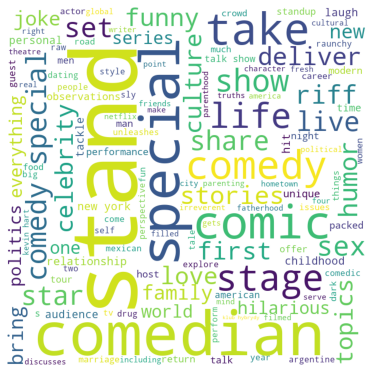

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: comdedian, stage, first, special, life, deliver, funny, humor, share**

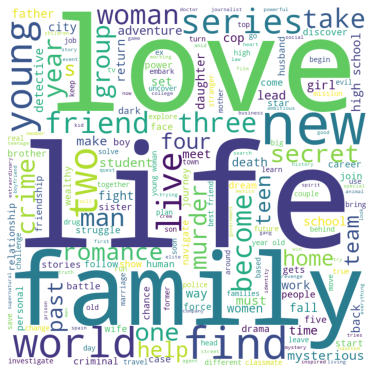

In [ ]:
# Wordcloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: life, love, family, word, find, new, young, three, team**

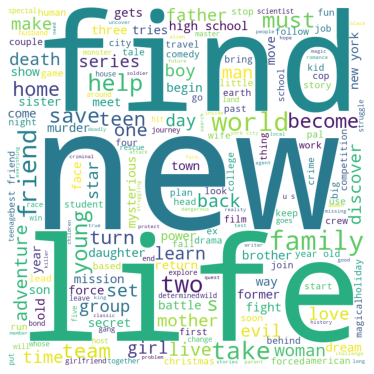

In [ ]:
# Wordcloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: life, new, find, word, family, become, girl, learn, school**

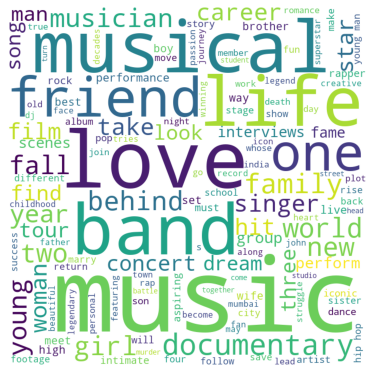

In [ ]:
# Wordcloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: muscial,friend, love, band, music, documentary, one, young, life**

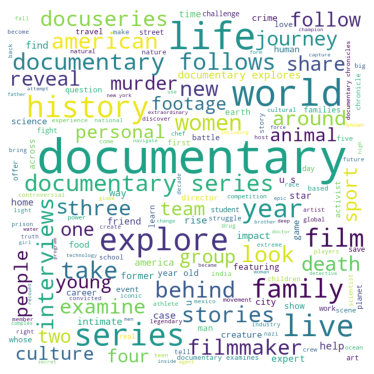

In [ ]:
# Wordcloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: documentary, series, family, live, animal, explore, filmmaker, world, live**

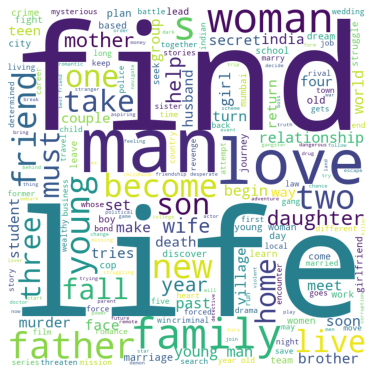

In [ ]:
# Wordcloud for cluster 5
kmeans_worldcloud(5)

**Keywords observed in cluster 5: find, life, family, man, woman,friend, brother, young, three**

## **7.2. Hierarchical clustering:**

Building clusters using the agglomerative (hierarchical) clustering algorithm.
Agglomerative hierarchical clustering is a method of clustering that is used to build a hierarchy of clusters. It is a bottom-up approach, where each sample is initially treated as a single-sample cluster and clusters are merged together as they are deemed similar.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

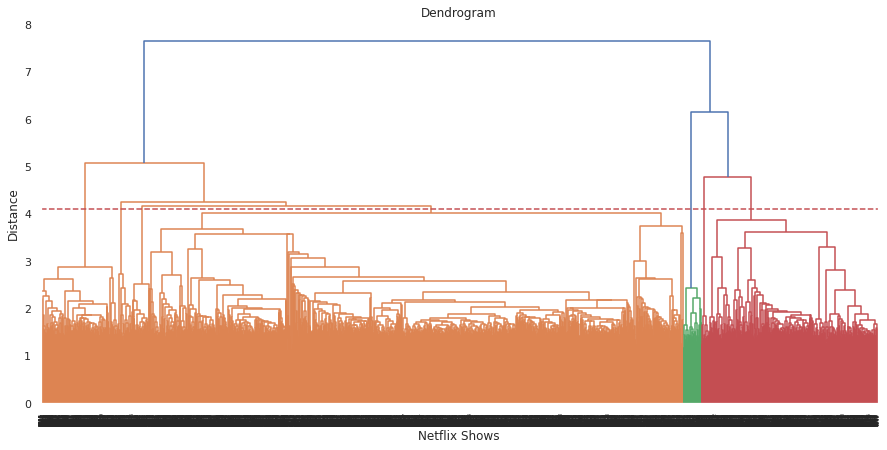

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(15,7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4.1, color='r', linestyle='--')

- **At a distance of 4.1 units, 7 clusters can be built using the agglomerative clustering algorithm.**

Building 7 clusters using the Agglomerative clustering algorithm:

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# Adding a hierarchical cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

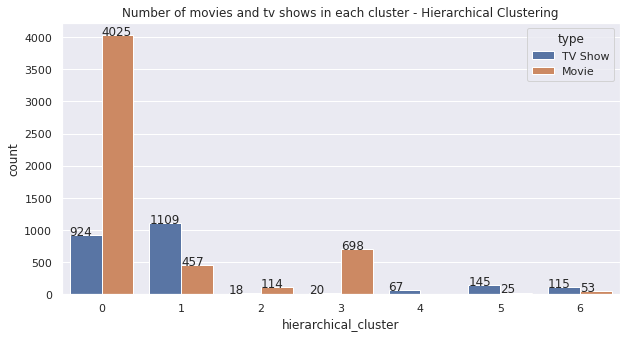

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

- **Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.**

### **7.2.1. Building wordclouds for different clusters built:**

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

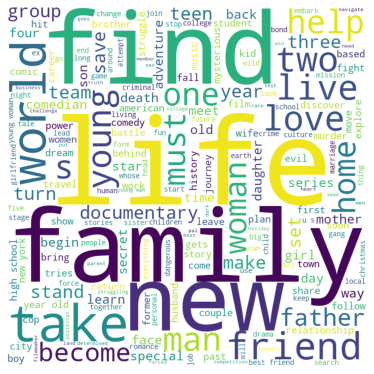

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)

**Keywords observed in cluster 0: find, life, family, new, take, friend, become, love, live**

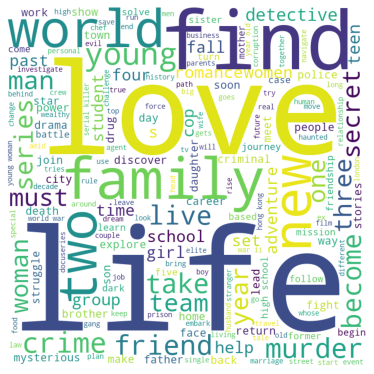

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

**Keywords observed in cluster 1: life, love, family, world, find, friend, young, must, crime**

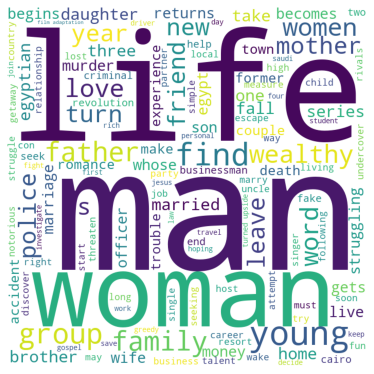

In [ ]:
# Wordcloud for cluster 2
hierarchical_worldcloud(2)

**Keywords observed in cluster 2: life, man, women, young, group, family, young, find, polics**

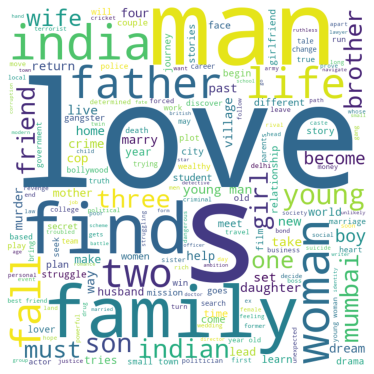

In [ ]:
# Wordcloud for cluster 3
hierarchical_worldcloud(3)

**Keywords observed in cluster 3: father, love, family, man, find, friend, indian, women, india**

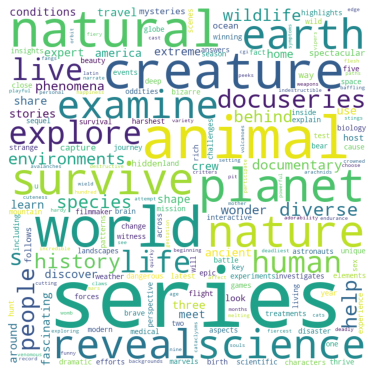

In [ ]:
# Wordcloud for cluster 4
hierarchical_worldcloud(4)

**Keywords observed in cluster 4: natural, creature, examine, planet, series, world, earth, explore, planet**

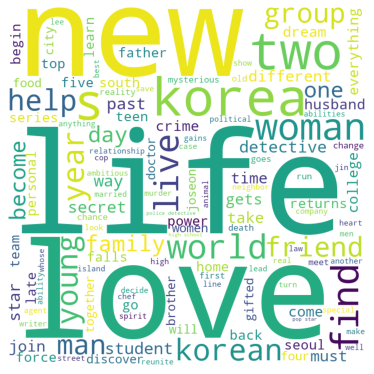

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

**Keywords observed in cluster 5: new, love, life, korean, women, two, group, help, world**

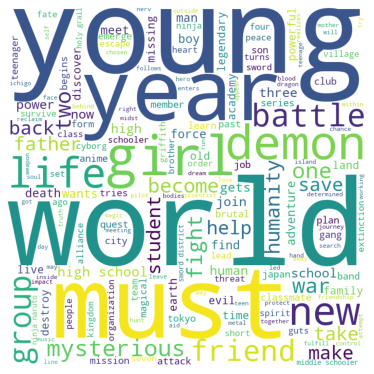

In [ ]:
# Wordcloud for cluster 6
hierarchical_worldcloud(6)

**Keywords observed in cluster 6: young, years, world, must, life, new, demon, group, battle**

# **8. Content based recommender system:**

Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

In [ ]:
# veryfying index
df1[['show_id', 'title', 'clustering_attributes']]

,show_id,title,clustering_attributes
0,s1,3%,futur elit inhabit island paradis far crowd sl...
1,s2,7:19,devast earthquak hit mexico citi trap survivor...
2,s3,23:59,armi recruit found dead fellow soldier forc co...
3,s4,9,postapocalypt world ragdol robot hide fear dan...
4,s5,21,brilliant group student becom cardcount expert...
...,...,...,...
7782,s7783,Zozo,lebanon civil war depriv zozo famili hes left ...
7783,s7784,Zubaan,scrappi poor boy worm way tycoon dysfunct fami...
7784,s7785,Zulu Man in Japan,documentari south african rapper nasti c hit s...
7785,s7786,Zumbo's Just Desserts,dessert wizard adriano zumbo look next willi w...


- As you can see above dataframe there are total 7770 rows present in our dataframe and it show last index as 7786 because of dropping some of the rows while treating null values.



In [ ]:
# defining a new df for building a recommender system
recommender_df = df1.copy()

In [ ]:
# reseting index
recommender_df.reset_index(inplace=True)

# checking reset index 
recommender_df[['show_id', 'title', 'clustering_attributes']]

,show_id,title,clustering_attributes
0,s1,3%,futur elit inhabit island paradis far crowd sl...
1,s2,7:19,devast earthquak hit mexico citi trap survivor...
2,s3,23:59,armi recruit found dead fellow soldier forc co...
3,s4,9,postapocalypt world ragdol robot hide fear dan...
4,s5,21,brilliant group student becom cardcount expert...
...,...,...,...
7765,s7783,Zozo,lebanon civil war depriv zozo famili hes left ...
7766,s7784,Zubaan,scrappi poor boy worm way tycoon dysfunct fami...
7767,s7785,Zulu Man in Japan,documentari south african rapper nasti c hit s...
7768,s7786,Zumbo's Just Desserts,dessert wizard adriano zumbo look next willi w...


- We successfully reset the index. Now dataset is ready to build content based recommandation system.

In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
# calling out transformed array after performing PCA for dimenssionality reduction.
X

array([[ 0.16484564,  0.00026758,  0.00446643, ..., -0.00272191,
         0.00331044, -0.01879583],
       [-0.0436649 , -0.01207622, -0.01020053, ...,  0.00162992,
        -0.0090143 ,  0.00346889],
       [-0.04163339, -0.04227634,  0.04215174, ..., -0.0035777 ,
         0.00734431,  0.00374937],
       ...,
       [-0.0726789 , -0.01792634, -0.07238854, ...,  0.00247146,
         0.00489293, -0.00353534],
       [ 0.06320542,  0.03544615, -0.02425431, ..., -0.00768187,
        -0.00454584, -0.00370425],
       [-0.06199697,  0.18926137, -0.15094831, ...,  0.00065394,
        -0.00893045,  0.01152527]])

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.07993093,  0.01817948, ..., -0.01888173,
         0.00810855, -0.0174257 ],
       [ 0.07993093,  1.        , -0.00163699, ...,  0.07049785,
        -0.00482222, -0.00943575],
       [ 0.01817948, -0.00163699,  1.        , ...,  0.00371611,
        -0.00640071, -0.01448414],
       ...,
       [-0.01888173,  0.07049785,  0.00371611, ...,  1.        ,
        -0.00990786,  0.0510367 ],
       [ 0.00810855, -0.00482222, -0.00640071, ..., -0.00990786,
         1.        ,  0.03754309],
       [-0.0174257 , -0.00943575, -0.01448414, ...,  0.0510367 ,
         0.03754309,  1.        ]])

#### **Function for list down top 10 recommended movie on the basis of cosine similarity score.**

In [ ]:
def recommend(movie):
  try:
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    # Empty list
    recommend_content = []   
    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]
    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    # printing Statement
    print(f"If you liked '{movie}', you may also enjoy: \n")
    # listing top ten recommenaded movie
    for i in distances[1:11]:
      recommend_content.append(df1.iloc[i[0]].title)
    return recommend_content
  except:
     return 'Invalid Entry'

In [ ]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 



['Naruto Shippûden the Movie: Bonds',
 'Naruto Shippuden: The Movie',
 'Naruto Shippuden : Blood Prison',
 'Naruto the Movie 2: Legend of the Stone of Gelel',
 'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
 'Naruto Shippûden the Movie: The Will of Fire',
 'Naruto Shippuden: The Movie: The Lost Tower',
 'Dino Girl Gauko',
 'DRIFTING DRAGONS',
 'Marvel Anime: Wolverine']

In [ ]:
recommend('A Man Called God')

If you liked 'A Man Called God', you may also enjoy: 



['Illang: The Wolf Brigade',
 'The Sound of Your Heart',
 'Can We Get Married?',
 'Hospital Playlist',
 'Mr. Sunshine',
 'Rugal',
 'Second 20s',
 'Hello, My Twenties!',
 'Extracurricular',
 'Inheritors']

In [ ]:
recommend('Avenger')

'Invalid Entry'

In [ ]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 



['Bhool Bhulaiyaa',
 'Thank You',
 'Golmaal: Fun Unlimited',
 'Bhagam Bhag',
 'Chup Chup Ke',
 'Ready',
 'Khushi',
 'Hasee Toh Phasee',
 'Hattrick',
 'Welcome']

# **9. Conclusion**

- **In this project, we worked on a text clustering problem wherein we had to cluster the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.**
- **The dataset contained about 7787 records, and 11 attributes.
We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).**
- **It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States.**
- **I decided to cluster the data based on the attributes like director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.**
- **Through TFIDF Vectorization, we created a total of 10000 attributes**.
- **We used Principal Component Analysis (PCA) to reduce dimensionality.4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.**
- **We first built clusters using the K-Means Clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.**
- **Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 7. This was obtained after visualizing the dendrogram**.
- **A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make top 10 recommendations to the user based on the type of show they watched.**

# **THANK YOU !**